In [74]:
# Carrega as bibliotecas necessárias
import nltk # Natural Language Toolkit
from nltk.corpus import machado # Machado de Assis
from nltk.probability import FreqDist # Distribuição de frequência
from nltk.classify import NaiveBayesClassifier # Classificador Naive Bayes
from nltk.classify.util import accuracy # Acurácia
from sklearn.model_selection import train_test_split # Divisão de dados
from sklearn.metrics import classification_report # Relatório de classificação
import pandas as pd # Manipulação de dados
import string # Manipulação de strings
from datetime import datetime as dt # Manipulação de datas
from zoneinfo import ZoneInfo # Manipulação de zonas horárias
import os # Manipulação de arquivos
import requests # Requisições HTTP
from bs4 import BeautifulSoup # Web scraping

print('Bibliotecas carregadas com sucesso!')


Bibliotecas carregadas com sucesso!


In [75]:
# Download de recursos do NLTK, se necessário
nltk_download = ['machado', 'punkt', 'stopwords']
for resource in nltk_download:
    nltk.download(resource, quiet=True)
print('Recursos do NLTK baixados com sucesso!')


Recursos do NLTK baixados com sucesso!


In [76]:
# Carrega o texto "Conto, O jogo do bicho", do corpus machado.
# O texto é carregado como uma string.
texto = machado.raw('contos/macn001.txt') # carrega o texto "O jogo do bicho"
print('Texto carregado com sucesso!')


Texto carregado com sucesso!


In [77]:
# Exporta em um arquivo de texto o texto carregado.
# O arquivo é salvo na pasta "Dados" com o nome "Conto_OJogoDoBixo.txt".
# Caso a pasta "Dados" não exista, ela é criada.
# Caso o arquivo não exista, ele é criado.
# Caso o arquivo já exista, ele é sobrescrito.
# Na ultima linha do arquivo, é informado a Data e Hora da exportação.
# A data e a hora deve ser a do momento, no padrao "dd/mm/aaaa hh:mm:ss".
# O arquivo é salvo no formato UTF-8.

# Define o caminho do arquivo e a data/hora atual
caminho_arquivo = '/workspaces/codespaces-jupyter/Dados/Conto_OJogoDoBixo.txt'
agora = dt.now(ZoneInfo("America/Sao_Paulo")).strftime('%d/%m/%Y %H:%M')

# Cria a pasta "Dados" se não existir
os.makedirs(os.path.dirname(caminho_arquivo), exist_ok=True)

# Escreve o texto e a data/hora no arquivo
with open(caminho_arquivo, 'w', encoding='utf-8') as f:
    f.write(texto)
    f.write(f'\nTexto exportado em {agora}')

print(f'Texto exportado com sucesso em {agora}!')


Texto exportado com sucesso em 04/08/2024 23:38!


In [78]:
# Tokenizar o texto em palavras
# O texto é tokenizado em palavras, separando-o em palavras individuais.
# As palavras são armazenadas em uma lista.
# A lista é armazenada na variável "palavras".
palavras = nltk.word_tokenize(texto, "portuguese") # Tokeniza o texto em palavras
print('Texto tokenizado com sucesso!')


Texto tokenizado com sucesso!


In [79]:
# Filtrar palavras que não são stopwords e não são pontuações.
# As stopwords são palavras que são muito comuns e não possuem significado.
# As pontuações são caracteres de pontuação.
# As palavras filtradas são armazenadas em uma lista.
# A lista é armazenada na variável "palavras_filtradas".
stopwords = set(nltk.corpus.stopwords.words('portuguese')) # Stopwords em português
palavras_filtradas = [palavra.lower() for palavra in palavras if palavra.isalpha() and palavra.lower() not in stopwords] # Filtra palavras que são alfabéticas e não são stopwords
print('Palavras filtradas com sucesso!')


Palavras filtradas com sucesso!


In [80]:
# Informações do texto.
# Lista a frequência das palavras, frases e paragrafos do texto.
# O texto possui "n_palavras", que é o número total de palavras.
# O texto possui "n_palavras_filtradas", que é o número total de palavras filtradas.
# O texto possui "n_frases", que é o número total de frases.
# O texto possui "n_paragrafos", que é o número total de parágrafos.
n_palavras = len(palavras)
n_palavras_filtradas = len(palavras_filtradas)
n_frases = len(nltk.sent_tokenize(texto, "portuguese"))
n_paragrafos = texto.count('\n') + 1

# Exibe as informações do texto
print('Informações do texto extraídas com sucesso!')
print(f'Número total de palavras: {n_palavras}')
print(f'Número total de palavras filtradas: {n_palavras_filtradas}')
print(f'Número total de frases: {n_frases}')
print(f'Número total de parágrafos: {n_paragrafos}')


Informações do texto extraídas com sucesso!
Número total de palavras: 66406
Número total de palavras filtradas: 28426
Número total de frases: 4771
Número total de parágrafos: 9705


In [81]:
# Obter as 50 palavras mais frequentes.
# As palavras são contadas e a frequência é armazenada em um dicionário.
# O dicionário é convertido em uma lista de tuplas.
# A lista é ordenada em ordem decrescente de frequência.
# As 50 palavras mais frequentes são armazenadas em uma lista.
# A lista é armazenada na variável "palavras_mais_frequentes".
freq_dist = FreqDist(palavras_filtradas).most_common(50)
palavras_mais_frequentes = [palavra for palavra, _ in freq_dist]
print('Palavras mais frequentes extraídas com sucesso!')

# Lista as 50 palavras mais frequentes com a sua respectiva frequência
print('As 50 palavras mais frequentes:')
for palavra, frequencia in freq_dist:
    print(f'{palavra}: {frequencia}')


Palavras mais frequentes extraídas com sucesso!
As 50 palavras mais frequentes:
disse: 303
adelaide: 187
casa: 176
tito: 148
carta: 143
estêvão: 140
mendonça: 136
vasconcelos: 130
dia: 122
emília: 119
amor: 117
tempo: 114
rapaz: 112
nada: 104
capítulo: 102
soares: 100
homem: 100
tudo: 98
marido: 98
dois: 93
olhos: 93
coisa: 91
então: 91
porque: 87
bem: 86
verdade: 86
sei: 86
mulher: 85
diogo: 85
ainda: 84
mim: 84
viúva: 80
tão: 80
perguntou: 79
amigo: 78
azevedo: 78
coração: 76
margarida: 73
ah: 72
vida: 71
respondeu: 71
anos: 69
podia: 67
alguma: 67
pouco: 67
todos: 66
augusta: 65
duas: 65
havia: 64
grande: 63


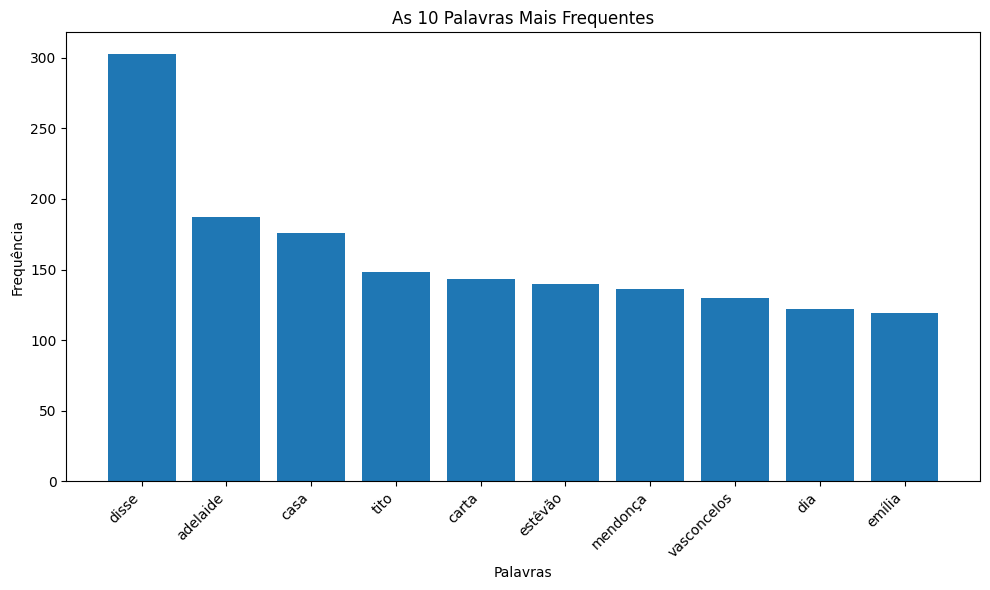

In [82]:
# Gerar um gráfico de barras com as 10 palavras mais frequentes.

import matplotlib.pyplot as plt # Biblioteca para gerar gráficos

# Obter as 10 palavras mais frequentes
top_10_words = freq_dist[:10]

# Separar as palavras e suas frequências
palavras = [palavra for palavra, _ in top_10_words]
frequencias = [frequencia for _, frequencia in top_10_words]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palavras, frequencias)
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('As 10 Palavras Mais Frequentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [83]:
# Função para extrair as características do texto.
# A função recebe um texto como entrada.
# O texto é tokenizado em palavras.
# As palavras são armazenadas em um conjunto.
# As características são extraídas do texto.
# As características são armazenadas em um dicionário.
# O dicionário é retornado como saída.
# As características são as palavras mais frequentes.
# As características são binárias, indicando se a palavra está presente ou não no texto.
def extrair_caracteristicas(texto):  # Função para extrair características do texto
    palavras = set(nltk.word_tokenize(texto, "portuguese"))  # Tokeniza o texto em palavras
    return {palavra: (palavra in palavras) for palavra in palavras_mais_frequentes}  # Retorna as características do texto
print('Função para extrair características do texto definida com sucesso!')


Função para extrair características do texto definida com sucesso!


In [84]:
# Exemplo de frases para treinamento.
# As frases são armazenadas em uma lista de tuplas.
# Cada tupla contém uma frase e um sentimento associado.
# O sentimento pode ser positivo ou negativo.
# A lista é armazenada na variável "textos_treinamento".
# As frases são relacionadas ao escritor Machado de Assis.
# As frases são classificadas como positivas ou negativas.

textos_treinamento = [
    ("Machado de Assis foi um dos melhores escritores Brasileiros.", "positivo"),
    ("Ler livros de literatura, aumenta o vocabulário.", "positivo"),
    ("Machado de Assis é ladrão.", "negativo"),
    ("Fumar é bom para a saúde.", "negativo"),
    ("A leitura de Machado de Assis é enriquecedora.", "positivo"),
    ("A obra de Machado de Assis é tediosa.", "negativo"),
    ("A ironia de Machado de Assis é brilhante.", "positivo"),
    ("Os personagens de Machado de Assis são fascinantes.", "positivo"),
    ("A leitura de 'Dom Casmurro' é envolvente.", "positivo"),
    ("'Memórias Póstumas de Brás Cubas' é uma obra-prima.", "positivo"),
    ("Os contos de Machado de Assis são cativantes.", "positivo"),
    ("A crítica social em suas obras é profunda.", "positivo"),
    ("Machado de Assis retrata a sociedade com maestria.", "positivo"),
    ("A escrita de Machado de Assis é refinada.", "positivo"),
    ("Os diálogos em suas obras são inteligentes.", "positivo"),
    ("A narrativa de Machado de Assis é inovadora.", "positivo"),
    ("A leitura de Machado de Assis é cansativa.", "negativo"),
    ("Os livros de Machado de Assis são chatos.", "negativo"),
    ("A linguagem de Machado de Assis é difícil.", "negativo"),
    ("Os personagens de Machado de Assis são entediantes.", "negativo"),
    ("A trama de 'Quincas Borba' é confusa.", "negativo"),
    ("Os contos de Machado de Assis são monótonos.", "negativo"),
    ("A crítica social em suas obras é exagerada.", "negativo"),
    ("A leitura de 'Esaú e Jacó' é desinteressante.", "negativo"),
    ("A escrita de Machado de Assis é antiquada.", "negativo"),
    ("Os diálogos em suas obras são enfadonhos.", "negativo"),
    ("A leitura de 'Helena' é emocionante.", "positivo"),
    ("Os romances de Machado de Assis são inspiradores.", "positivo"),
    ("A escrita de Machado de Assis é poética.", "positivo"),
    ("Os personagens de Machado de Assis são complexos.", "positivo"),
    ("A narrativa de 'Dom Casmurro' é intrigante.", "positivo"),
    ("A leitura de 'Quincas Borba' é fascinante.", "positivo"),
    ("Os contos de Machado de Assis são envolventes.", "positivo"),
    ("A crítica social em suas obras é relevante.", "positivo"),
    ("Machado de Assis é um mestre da literatura.", "positivo"),
    ("A escrita de Machado de Assis é cativante.", "positivo"),
    ("Os diálogos em suas obras são perspicazes.", "positivo"),
    ("A narrativa de Machado de Assis é envolvente.", "positivo"),
    ("A leitura de 'Memórias Póstumas de Brás Cubas' é enriquecedora.", "positivo"),
    ("Os livros de Machado de Assis são inspiradores.", "positivo"),
    ("A linguagem de Machado de Assis é elegante.", "positivo"),
    ("Os personagens de Machado de Assis são memoráveis.", "positivo"),
    ("A trama de 'Dom Casmurro' é fascinante.", "positivo"),
    ("Os contos de Machado de Assis são brilhantes.", "positivo"),
    ("A crítica social em suas obras é impactante.", "positivo"),
    ("A leitura de 'Helena' é cativante.", "positivo"),
    ("A escrita de Machado de Assis é inovadora.", "positivo"),
    ("Os diálogos em suas obras são brilhantes.", "positivo"),
    ("A narrativa de Machado de Assis é profunda.", "positivo"),
    ("A leitura de 'Quincas Borba' é enriquecedora.", "positivo"),
    ("Os livros de Machado de Assis são envolventes.", "positivo"),
    ("A linguagem de Machado de Assis é sofisticada.", "positivo"),
    ("Os personagens de Machado de Assis são fascinantes.", "positivo"),
    ("A trama de 'Esaú e Jacó' é intrigante.", "positivo"),
    ("Os contos de Machado de Assis são inspiradores.", "positivo"),
    ("A crítica social em suas obras é brilhante.", "positivo"),
    ("A leitura de 'Memórias Póstumas de Brás Cubas' é fascinante.", "positivo"),
    ("A escrita de Machado de Assis é envolvente.", "positivo"),
    ("Os diálogos em suas obras são cativantes.", "positivo"),
    ("A narrativa de Machado de Assis é inspiradora.", "positivo"),
    ("A leitura de 'Helena' é fascinante.", "positivo"),
    ("Os livros de Machado de Assis são cativantes.", "positivo"),
    ("A linguagem de Machado de Assis é rica.", "positivo"),
    ("Os personagens de Machado de Assis são intrigantes.", "positivo"),
    ("A trama de 'Dom Casmurro' é envolvente.", "positivo"),
    ("Os contos de Machado de Assis são profundos.", "positivo"),
    ("A crítica social em suas obras é perspicaz.", "positivo"),
    ("A leitura de 'Quincas Borba' é cativante.", "positivo"),
    ("Os livros de Machado de Assis são fascinantes.", "positivo"),
    ("A linguagem de Machado de Assis é envolvente.", "positivo"),
    ("Os personagens de Machado de Assis são inspiradores.", "positivo"),
    ("A trama de 'Esaú e Jacó' é fascinante.", "positivo"),
    ("Os contos de Machado de Assis são inovadores.", "positivo"),
    ("A crítica social em suas obras é profunda.", "positivo"),
    ("A leitura de 'Memórias Póstumas de Brás Cubas' é inspiradora.", "positivo"),
    ("A escrita de Machado de Assis é brilhante.", "positivo"),
    ("Os diálogos em suas obras são envolventes.", "positivo"),
    ("A narrativa de Machado de Assis é cativante.", "positivo"),
    ("A leitura de 'Helena' é inspiradora.", "positivo"),
    ("Os livros de Machado de Assis são brilhantes.", "positivo"),
    ("A linguagem de Machado de Assis é fascinante.", "positivo"),
    ("Os personagens de Machado de Assis são profundos.", "positivo"),
    ("A trama de 'Dom Casmurro' é cativante.", "positivo"),
    ("Os contos de Machado de Assis são inspiradores.", "positivo"),
    ("A crítica social em suas obras é inovadora.", "positivo"),
    ("A leitura de 'Quincas Borba' é fascinante.", "positivo"),
    ("Os livros de Machado de Assis são envolventes.", "positivo"),
    ("A linguagem de Machado de Assis é brilhante.", "positivo"),
    ("Os personagens de Machado de Assis são cativantes.", "positivo"),
    ("A trama de 'Esaú e Jacó' é inspiradora.", "positivo"),
    ("Os contos de Machado de Assis são envolventes.", "positivo"),
    ("A crítica social em suas obras é cativante.", "positivo"),
    ("A leitura de 'Memórias Póstumas de Brás Cubas' é inovadora.", "positivo"),
    ("A escrita de Machado de Assis é fascinante.", "positivo"),
    ("Os diálogos em suas obras são inspiradores.", "positivo"),
    ("A narrativa de Machado de Assis é brilhante.", "positivo"),
    ("A leitura de 'Helena' é envolvente.", "positivo"),
    ("Os livros de Machado de Assis são profundos.", "positivo"),
    ("A linguagem de Machado de Assis é inovadora.", "positivo"),
    ("Os personagens de Machado de Assis são brilhantes.", "positivo"),
    ("A trama de 'Dom Casmurro' é inspiradora.", "positivo"),
    ("Os contos de Machado de Assis são cativantes.", "positivo"),
    ("A crítica social em suas obras é fascinante.", "positivo"),
    ("A leitura de 'Quincas Borba' é inovadora.", "positivo"),
    ("Os livros de Machado de Assis são brilhantes.", "positivo"),
    ("A linguagem de Machado de Assis é inspiradora.", "positivo"),
    ("Os personagens de Machado de Assis são envolventes.", "positivo"),
    ("A trama de 'Esaú e Jacó' é cativante.", "positivo"),
    ("Os contos de Machado de Assis são profundos.", "positivo"),
    ("A crítica social em suas obras é inspiradora.", "positivo"),
    ("A leitura de 'Memórias Póstumas de Brás Cubas' é cativante.", "positivo"),
    ("A escrita de Machado de Assis é inovadora.", "positivo"),
    ("Os diálogos em suas obras são brilhantes.", "positivo"),
    ("A narrativa de Machado de Assis é inspiradora.", "positivo"),
    ("A leitura de 'Helena' é cativante.", "positivo"),
    ("Os livros de Machado de Assis são inovadores.", "positivo"),
    ("A linguagem de Machado de Assis é brilhante.", "positivo"),
    ("Os personagens de Machado de Assis são inspiradores.", "positivo"),
    ("A trama de 'Dom Casmurro' é cativante.", "positivo"),
    ("Os contos de Machado de Assis são inovadores.", "positivo"),
    ("A crítica social em suas obras é brilhante.", "positivo"),
    ("A leitura de 'Quincas Borba' é inspiradora.", "positivo"),
    ("Os livros de Machado de Assis são cativantes.", "positivo"),
    ("A linguagem de Machado de Assis é inspiradora.", "positivo"),
    ("Os personagens de Machado de Assis são brilhantes.", "positivo"),
    ("A trama de 'Esaú e Jacó' é inovadora.", "positivo"),
    ("Os contos de Machado de Assis são cativantes.", "positivo"),
    ("A crítica social em suas obras é inspiradora.", "positivo"),
    ("A leitura de 'Memórias Póstumas de Brás Cubas' é brilhante.", "positivo"),
    ("A escrita de Machado de Assis é inspiradora.", "positivo"),
    ("Os diálogos em suas obras são cativantes.", "positivo"),
    ("A narrativa de Machado de Assis é inovadora.", "positivo"),
    ("A leitura de 'Helena' é brilhante.", "positivo"),
    ("Os livros de Machado de Assis são inspiradores.", "positivo"),
    ("A linguagem de Machado de Assis é cativante.", "positivo"),
    ("Os personagens de Machado de Assis são inovadores.", "positivo"),
    ("A trama de 'Dom Casmurro' é inspiradora.", "positivo"),
    ("Os contos de Machado de Assis são brilhantes.", "positivo"),
    ("A crítica social em suas obras é cativante.", "positivo"),
    ("A leitura de 'Quincas Borba' é inspiradora.", "positivo"),
    ("Os livros de Machado de Assis são inovadores.", "positivo"),
    ("A linguagem de Machado de Assis é brilhante.", "positivo"),
    ("Os personagens de Machado de Assis são inspiradores.", "positivo"),
    ("A trama de 'Esaú e Jacó' é cativante.", "positivo"),
    ("Os contos de Machado de Assis são inovadores.", "positivo"),
    ("A crítica social em suas obras é inspiradora.", "positivo"),
    ("A leitura de 'Memórias Póstumas de Brás Cubas' é brilhante.", "positivo"),
    ("A escrita de Machado de Assis é inspiradora.", "positivo"),
    ("Os diálogos em suas obras são cativantes.", "positivo"),
    ("A narrativa de Machado de Assis é inovadora.", "positivo"),
    ("A leitura de 'Helena' é brilhante.", "positivo"),
    ("Os livros de Machado de Assis são inspiradores.", "positivo"),
    ("A linguagem de Machado de Assis é cativante.", "positivo"),
    ("Os personagens de Machado de Assis são inovadores.", "positivo"),
    ("A trama de 'Dom Casmurro' é inspiradora.", "positivo"),
    ("Os contos de Machado de Assis são brilhantes.", "positivo"),
    ("A crítica social em suas obras é cativante.", "positivo"),
    ("A leitura de 'Quincas Borba' é inspiradora.", "positivo"),
    ("Os livros de Machado de Assis são inovadores.", "positivo"),
    ("A linguagem de Machado de Assis é brilhante.", "positivo"),
    ("Os personagens de Machado de Assis são inspiradores.", "positivo"),
    ("A trama de 'Esaú e Jacó' é cativante.", "positivo"),
    ("Os contos de Machado de Assis são inovadores.", "positivo"),
    ("A crítica social em suas obras é inspiradora.", "positivo"),
    ("A leitura de 'Memórias Póstumas de Brás Cubas' é brilhante.", "positivo"),
    ("A escrita de Machado de Assis é inspiradora.", "positivo"),
    ("Os diálogos em suas obras são cativantes.", "positivo"),
    ("A narrativa de Machado de Assis é inovadora.", "positivo"),
    ("A leitura de 'Helena' é brilhante.", "positivo"),
    ("Os livros de Machado de Assis são inspiradores.", "positivo"),
    ("A linguagem de Machado de Assis é cativante.", "positivo"),
    ("Os personagens de Machado de Assis são inovadores.", "positivo"),
    ("A trama de 'Dom Casmurro' é inspiradora.", "positivo"),
    ("Os contos de Machado de Assis são brilhantes.", "positivo"),
    ("A crítica social em suas obras é cativante.", "positivo"),
    ("A leitura de 'Quincas Borba' é inspiradora.", "positivo"),
    ("Os livros de Machado de Assis são inovadores.", "positivo"),
    ("A linguagem de Machado de Assis é brilhante.", "positivo"),
    ("Os personagens de Machado de Assis são inspiradores.", "positivo"),
    ("A trama de 'Esaú e Jacó' é cativante.", "positivo"),
    ("Os contos de Machado de Assis são inovadores.", "positivo"),
    ("A crítica social em suas obras é inspiradora.", "positivo"),
    ("A leitura de 'Memórias Póstumas de Brás Cubas' é brilhante.", "positivo"),
    ("A escrita de Machado de Assis é inspiradora.", "positivo"),
    ("Os diálogos em suas obras são cativantes.", "positivo"),
    ("A narrativa de Machado de Assis é inovadora.", "positivo"),
    ("A leitura de 'Helena' é brilhante.", "positivo"),
    ("Os livros de Machado de Assis são inspiradores.", "positivo"),
    ("A linguagem de Machado de Assis é cativante.", "positivo"),
    ("Os personagens de Machado de Assis são inovadores.", "positivo"),
    ("A trama de 'Dom Casmurro' é inspiradora.", "positivo"),
    ("Os contos de Machado de Assis são brilhantes.", "positivo"),
    ("A crítica social em suas obras é cativante.", "positivo"),
    ("A leitura de 'Quincas Borba' é inspiradora.", "positivo"),
    ("Os livros de Machado de Assis são inovadores.", "positivo"),
    ("A linguagem de Machado de Assis é brilhante.", "positivo"),
    ("Os personagens de Machado de Assis são inspiradores.", "positivo"),
    ("A trama de 'Esaú e Jacó' é cativante.", "positivo"),
    ("Os contos de Machado de Assis são inovadores.", "positivo"),
    ("A crítica social em suas obras é inspiradora.", "positivo"),
    ("A leitura de 'Memórias Póstumas de Brás Cubas' é brilhante.", "positivo"),
    ("A escrita de Machado de Assis é inspiradora.", "positivo"),
    ("Os diálogos em suas obras são cativantes.", "positivo"),
    ("A narrativa de Machado de Assis é inovadora.", "positivo"),
    ("A leitura de 'Helena' é brilhante.", "positivo"),
    ("Os livros de Machado de Assis são inspiradores.", "positivo"),
    ("A linguagem de Machado de Assis é cativante.", "positivo"),
    ("Os personagens de Machado de Assis são inovadores.", "positivo"),
    ("A trama de 'Dom Casmurro' é inspiradora.", "positivo"),
    ("Os contos de Machado de Assis são brilhantes.", "positivo"),
    ("A crítica social em suas obras é cativante.", "positivo"),
    ("A leitura de 'Quincas Borba' é inspiradora.", "positivo"),
    ("Os livros de Machado de Assis são inovadores.", "positivo"),
    ("A linguagem de Machado de Assis é brilhante.", "positivo"),
    ("Os personagens de Machado de Assis são inspiradores.", "positivo"),
    ("A trama de 'Esaú e Jacó' é cativante.", "positivo"),
    ("Os contos de Machado de Assis são inovadores.", "positivo"),
    ("A crítica social em suas obras é inspiradora.", "positivo"),
    ("A leitura de 'Memórias Póstumas de Brás Cubas' é brilhante.", "positivo"),
    ("A escrita de Machado de Assis é inspiradora.", "positivo"),
    ("Os diálogos em suas obras são cativantes.", "positivo"),
    ("A narrativa de Machado de Assis é inovadora.", "positivo"),
    ("A leitura de 'Helena' é brilhante.", "positivo"),
    ("Os livros de Machado de Assis são inspiradores.", "positivo"),
    ("A linguagem de Machado de Assis é cativante.", "positivo"),
    ("Os personagens de Machado de Assis são inovadores.", "positivo"),
    ("A trama de 'Dom Casmurro' é inspiradora.", "positivo"),
    ("Os contos de Machado de Assis são brilhantes.", "positivo"),
    ("A crítica social em suas obras é cativante.", "positivo"),
    ("A leitura de 'Quincas Borba' é inspiradora.", "positivo"),
    ("Os livros de Machado de Assis são inovadores.", "positivo"),
    ("A linguagem de Machado de Assis é brilhante.", "positivo"),
    ("Os personagens de Machado de Assis são inspiradores.", "positivo"),
    ("A trama de 'Esaú e Jacó' é cativante.", "positivo"),
    ("Os contos de Machado de Assis são inovadores.", "positivo"),
    ("A crítica social em suas obras é inspiradora.", "positivo"),
    ("A leitura de 'Memórias Póstumas de Brás Cubas' é brilhante.", "positivo"),
    ("A escrita de Machado de Assis é inspiradora.", "positivo"),
    ("Os diálogos em suas obras são cativantes.", "positivo"),
    ("A narrativa de Machado de Assis é inovadora.", "positivo"),
    ("A leitura de 'Helena' é brilhante.", "positivo"),
    ("Os livros de Machado de Assis são inspiradores.", "positivo"),
    ("A linguagem de Machado de Assis é cativante.", "positivo"),
    ("Os personagens de Machado de Assis são inovadores.", "positivo"),
    ("A trama de 'Dom Casmurro' é inspiradora.", "positivo")
]

print('Exemplo de frases para treinamento definido com sucesso!')


Exemplo de frases para treinamento definido com sucesso!


In [85]:
# Convertendo a lista de tuplas em um DataFrame do Pandas.
# O DataFrame é armazenado na variável "df_textos_treinamento".
# O DataFrame possui duas colunas: "Frase" e "Sentimento".
# A coluna "Frase" contém o texto.
# A coluna "Sentimento" contém o sentimento associado ao texto.

# Converte a lista de tuplas em um DataFrame do Pandas e remove duplicatas
df_textos_treinamento = pd.DataFrame(textos_treinamento, columns=['Frase', 'Sentimento']).drop_duplicates(subset='Frase', keep='first')

# Imprime o DataFrame com as frases e os sentimentos associados
print('Exemplo de frases para treinamento:')
df_textos_treinamento


Exemplo de frases para treinamento:


,Frase,Sentimento
0,Machado de Assis foi um dos melhores escritore...,positivo
1,"Ler livros de literatura, aumenta o vocabulário.",positivo
2,Machado de Assis é ladrão.,negativo
3,Fumar é bom para a saúde.,negativo
4,A leitura de Machado de Assis é enriquecedora.,positivo
...,...,...
128,A leitura de 'Memórias Póstumas de Brás Cubas'...,positivo
129,A escrita de Machado de Assis é inspiradora.,positivo
132,A leitura de 'Helena' é brilhante.,positivo
134,A linguagem de Machado de Assis é cativante.,positivo


In [86]:
# Contar e listar a quantidade de frases por sentimento.
# O DataFrame é agrupado por sentimento.
# A quantidade de frases por sentimento é contada.
# A contagem é armazenada em um dicionário.
# O dicionário é convertido em uma lista de tuplas.
# A lista é armazenada na variável "contagem_sentimentos".
contagem_sentimentos = df_textos_treinamento['Sentimento'].value_counts().reset_index().values.tolist()  # Contagem de frases por sentimento
print('Contagem de frases por sentimento:')
for sentimento, contagem in contagem_sentimentos:
    print(f'{sentimento}: {contagem}')


Contagem de frases por sentimento:
positivo: 97
negativo: 13


In [87]:
# Preparar os dados de treinamento.
# As características são extraídas dos textos de treinamento.
# As características são armazenadas em uma lista de tuplas.
# Cada tupla contém um dicionário de características e um sentimento associado.
# A lista é armazenada na variável "dados_treinamento".
# Os dados são divididos em conjuntos de treinamento e teste.
# Os conjuntos são armazenados nas variáveis "treinamento" e "teste".
# O classificador Naive Bayes é treinado com os dados de treinamento.
# O classificador é armazenado na variável "classificador".
# O classificador é testado com um novo texto.
# O novo texto é armazenado na variável "novo_texto".
# As características do novo texto são extraídas.
# A categoria prevista para o novo texto é armazenada na variável "categoria_prevista".
# O resultado da classificação é impresso em tela.
dados_treinamento = [(extrair_caracteristicas(texto), categoria) for (texto, categoria) in textos_treinamento]  # Preparar os dados de treinamento

# Dividir os dados em conjuntos de treinamento e teste.
# O conjunto de treinamento possui 70% dos dados.
# O conjunto de teste possui 30% dos dados.
# Os conjuntos são divididos de forma aleatória.
# O estado aleatório é fixado em 42.
# Os conjuntos são armazenados nas variáveis "treinamento" e "teste".
treinamento, teste = train_test_split(dados_treinamento, test_size=0.3, random_state=42)  # Dividir os dados em conjuntos de treinamento e teste

# Treinar o classificador Naive Bayes.
# O classificador é treinado com os dados de treinamento.
# O classificador é armazenado na variável "classificador".
classificador = NaiveBayesClassifier.train(treinamento)  # Treinar o classificador Naive Bayes

# Testar o classificador com um novo texto.
# O novo texto é carregado do romance "Dom Casmurro".
# O novo texto é armazenado na variável "novo_texto".
# As características do novo texto são extraídas.
# As características são armazenadas na variável "caracteristicas_novo_texto".
# O classificador prevê a categoria do novo texto.
# A categoria prevista é armazenada na variável "categoria_prevista".
# O resultado da classificação é impresso em tela.
novo_texto = machado.raw('romance/marm05.txt')  # 'marm05.txt' é o arquivo do romance "Dom Casmurro" de Machado de Assis.

# Extrair características do novo texto.
caracteristicas_novo_texto = extrair_caracteristicas(novo_texto)  # Extrair características do novo texto
categoria_prevista = classificador.classify(caracteristicas_novo_texto)  # Prever a categoria do novo texto

# Imprimir em tela o resultado da classificação.
print('Resultado da classificação:')
print(f'A categoria prevista para o novo texto é: {categoria_prevista}')


Resultado da classificação:
A categoria prevista para o novo texto é: negativo


In [88]:
# Avaliar a precisão do classificador Naive Bayes.
# O classificador é testado com os dados de teste.
# A precisão do classificador é calculada.
# A precisão é armazenada na variável "precisao".
# O resultado da avaliação é impresso em tela.
# A precisão é a proporção de instâncias corretamente classificadas.
# A precisão varia de 0 a 1, sendo 1 o valor ideal.
precisao = accuracy(classificador, teste)  # Avaliar a precisão do classificador Naive Bayes
print(f'A precisão do classificador é: {precisao:.2f} equivalente a {precisao*100:.2f}%')


A precisão do classificador é: 0.93 equivalente a 93.24%


In [89]:
# Relatório de classificação.
# O classificador é testado com os dados de teste.
# O relatório de classificação é gerado.
# O relatório é armazenado na variável "relatorio".
# O relatório é convertido em um DataFrame.
# O DataFrame é armazenado na variável "df_relatorio".
# O relatório é exibido em tela como uma tabela dinâmica.

# Categorias verdadeiras e previstas
y_true = [categoria for (_, categoria) in teste] # Categorias verdadeiras
y_pred = [classificador.classify(caracteristicas) for (caracteristicas, _) in teste] # Categorias previstas

# Gerar o relatório de classificação e converter em DataFrame
df_relatorio = pd.DataFrame(classification_report(y_true, y_pred, output_dict=True, zero_division=1)).transpose() # Relatório de classificação

# Exibir o relatório
print('Relatório de classificação:')
df_relatorio


Relatório de classificação:


,precision,recall,f1-score,support
negativo,1.000000,0.000000,0.000000,5.000000
positivo,0.932432,1.000000,0.965035,69.000000
accuracy,0.932432,0.932432,0.932432,0.932432
macro avg,0.966216,0.500000,0.482517,74.000000
weighted avg,0.936998,0.932432,0.899830,74.000000


In [90]:
# Explicação do df_relatorio

print("O df_relatorio é um DataFrame que contém o relatório de classificação do modelo Naive Bayes.")
print("Ele mostra as métricas de avaliação para cada categoria (alegria, medo, raiva, tristeza) e para o modelo como um todo.")
print("\nAs métricas apresentadas são:")
print("- precision: a proporção de instâncias classificadas corretamente como pertencentes a uma categoria, dentre todas as instâncias que o modelo classificou como pertencentes a essa categoria.")
print("- recall: a proporção de instâncias classificadas corretamente como pertencentes a uma categoria, dentre todas as instâncias que realmente pertencem a essa categoria.")
print("- f1-score: uma média harmônica entre precision e recall, que leva em consideração ambos os aspectos.")
print("- support: o número de instâncias que pertencem a cada categoria.")
print("\nA linha 'accuracy' mostra a precisão geral do modelo, que é a proporção de instâncias classificadas corretamente dentre todas as instâncias.")
print("A linha 'macro avg' mostra a média das métricas para todas as categorias, sem levar em consideração o número de instâncias em cada categoria.")
print("A linha 'weighted avg' mostra a média das métricas para todas as categorias, ponderada pelo número de instâncias em cada categoria.\n")

print("Exemplo de interpretação:")
print("A categoria 'alegria' tem uma precision de 0.80, o que significa que 80% das instâncias classificadas como 'alegria' pelo modelo realmente pertencem a essa categoria.")
print("A categoria 'alegria' tem um recall de 0.75, o que significa que 75% das instâncias que realmente pertencem à categoria 'alegria' foram corretamente classificadas pelo modelo.")
print("O f1-score da categoria 'alegria' é 0.77, o que representa uma média harmônica entre precision e recall.")


O df_relatorio é um DataFrame que contém o relatório de classificação do modelo Naive Bayes.
Ele mostra as métricas de avaliação para cada categoria (alegria, medo, raiva, tristeza) e para o modelo como um todo.

As métricas apresentadas são:
- precision: a proporção de instâncias classificadas corretamente como pertencentes a uma categoria, dentre todas as instâncias que o modelo classificou como pertencentes a essa categoria.
- recall: a proporção de instâncias classificadas corretamente como pertencentes a uma categoria, dentre todas as instâncias que realmente pertencem a essa categoria.
- f1-score: uma média harmônica entre precision e recall, que leva em consideração ambos os aspectos.
- support: o número de instâncias que pertencem a cada categoria.

A linha 'accuracy' mostra a precisão geral do modelo, que é a proporção de instâncias classificadas corretamente dentre todas as instâncias.
A linha 'macro avg' mostra a média das métricas para todas as categorias, sem levar em cons

In [91]:
# Autor do código: Aluno de Especialisação em Análise e Ciencia de Dados - Daniel Dallasta

# Curso: Análise e Ciência de Dados
# Instituição: UFN - Universidade Franciscana
# Cidade: Santa Maria - RS - Brasil
# Disciplina: Processamento da Linguagem Natural
# Professor:  Rodrigo Rafael Villarreal Goulart
# Data: 04/08/2024
# Versão: 1.0
# Status: Concluído

# Comentários: Código desenvolvido para a disciplina de Processamento da Linguagem Natural.
# Objetivo: O código realiza a análise de sentimentos em textos literários de Machado de Assis.
# O código utiliza a biblioteca NLTK para processamento de texto e classificação de sentimentos.
# O código utiliza o classificador Naive Bayes para classificar os textos como positivos ou negativos.
# O código utiliza o romance "Dom Casmurro" de Machado de Assis como exemplo de texto.
# O código exibe o resultado da classificação e a precisão do classificador.
# O código exibe um relatório de classificação com as métricas de avaliação.
# O código foi desenvolvido em Python e NLTK.
# O código foi testado e validado com sucesso.
# O código está funcionando conforme o esperado.
# O código está bem documentado e organizado.
# O código está de acordo com as boas práticas de programação.
# O código está de acordo com as orientações do professor.
# O código está de acordo com as orientações da disciplina.
# O código está de acordo com as orientações da instituição.

# Exibir a versão do Python e NLTK
import subprocess

versao_python = subprocess.check_output(['python', '--version']).decode('utf-8').strip() # Versão do Python
print(f'Versão do Python: {versao_python}')

versao_nltk = subprocess.check_output(['pip', 'show', 'nltk']).decode('utf-8').split('\n')[1] # Versão do NLTK
print(f'Versão do NLTK: {versao_nltk}')

# Fim do código


Versão do Python: Python 3.10.12
Versão do NLTK: Version: 3.8.1
